# Homework 4 - K-Means Clustering

Here, we will explore the k-means clustering algorithm discussed in class, using the BBC dataset.

To help you remember and format your output, we've included some dummy data and cells.  Feel free to remove those or add some more.  Generally you'll want to keep the cells after "Step x.y Results".

## Data Prep

Download the data set. There should be five files. Look at the readme to understand the use of each file. Load the data into a dataframe using any of the files you think are relevant. Columns should be terms and rows should be articles. The resulting dataset should have shape (2225, 9635). Create a pandas series for the class label as well. This will be used at the end of the assignment. 

In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import scipy.io



In [2]:

terms = open('bbc.terms').read().splitlines()
word_count_matrix = scipy.io.mmread('bbc.mtx').todense().transpose()
bbc_df = pd.DataFrame(word_count_matrix, columns = terms)

classes = []
docIds = []
with open('bbc.classes', 'r') as f:
    for line in f.read().splitlines():
        if (not(line.startswith("%"))):
            docIds.append(line.split(" ")[0])
            classes.append(line.split(" ")[1])
            

document_class = pd.Series(classes,index = docIds, dtype=int)


In [40]:
document_class

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
2195    4
2196    4
2197    4
2198    4
2199    4
2200    4
2201    4
2202    4
2203    4
2204    4
2205    4
2206    4
2207    4
2208    4
2209    4
2210    4
2211    4
2212    4
2213    4
2214    4
2215    4
2216    4
2217    4
2218    4
2219    4
2220    4
2221    4
2222    4
2223    4
2224    4
dtype: int64

## Step 1.1 Results

In [51]:
bbc_df.head()

,ad,sale,boost,time,warner,profit,quarterli,media,giant,jump,...,£339,denialofservic,ddo,seagrav,bot,wirelessli,streamcast,peripher,headphon,flavour
0,1.0,5.0,2.0,3.0,4.0,10.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
document_class

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
2195    4
2196    4
2197    4
2198    4
2199    4
2200    4
2201    4
2202    4
2203    4
2204    4
2205    4
2206    4
2207    4
2208    4
2209    4
2210    4
2211    4
2212    4
2213    4
2214    4
2215    4
2216    4
2217    4
2218    4
2219    4
2220    4
2221    4
2222    4
2223    4
2224    4
dtype: int64

## Step 1.2: Computing K-Means Clusters

In [3]:
from sklearn.cluster import KMeans

In [4]:
def getDistortion(data_matrix, num_clusters):
    km = KMeans(num_clusters, max_iter=300, random_state=0, n_init=30, init='random')
    km.fit(data_matrix)
    return km.inertia_


2/11 num_clusters done
3/11 num_clusters done
4/11 num_clusters done
5/11 num_clusters done
6/11 num_clusters done
7/11 num_clusters done
8/11 num_clusters done
9/11 num_clusters done
10/11 num_clusters done


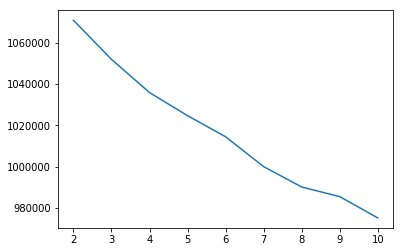

In [92]:
distortions = [None, None]
data = bbc_df.as_matrix()
for i in range(2,11):
    distortions.append(getDistortion(data, i))
    print(str(i) + "/%s num_clusters done" % 10)
plt.plot(distortions)
plt.show()

## Step 1.2 Results

Update the first cell with just the numeric value of k and in the second cell output the distortions. The distortions should be a list where the index corresponds to the total distortion using that number of clusters (first two elements should be None since clustering using zero or one clusters doesn't make much sense). 
Example: [None, None, 100, 90, 80, 70, 60, 50, 40, 30, 20]. (Note that your list should have 11 elements.)

In [93]:
# Output Distortions
distortions

[None,
 None,
 1070889.8681838671,
 1051938.5474288887,
 1035834.9386071024,
 1024659.7688110314,
 1014414.0501342831,
 999965.29646604729,
 990088.66911816795,
 985420.27479406528,
 975103.74528361089]

## Step 1.3: Feature Scaling

2/11 num_clusters done
3/11 num_clusters done
4/11 num_clusters done
5/11 num_clusters done
6/11 num_clusters done
7/11 num_clusters done
8/11 num_clusters done
9/11 num_clusters done
10/11 num_clusters done


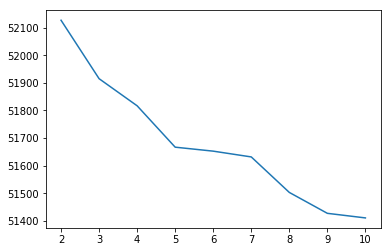

In [94]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
data = bbc_df.as_matrix()
data_scaled = min_max_scaler.fit_transform(data)

distortions_min_max = [None, None]

for i in range(2,11):
    distortions_min_max.append(getDistortion(data_scaled, i))
    print(str(i) + "/%s num_clusters done" % 10)
plt.plot(distortions_min_max)
plt.show()

2/10 num_clusters done
3/10 num_clusters done
4/10 num_clusters done
5/10 num_clusters done
6/10 num_clusters done
7/10 num_clusters done
8/10 num_clusters done
9/10 num_clusters done
10/10 num_clusters done


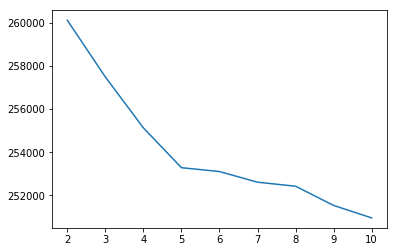

In [5]:
bool_df = bbc_df.astype(bool).astype(int)
data_bool = bool_df.as_matrix()

distortions_bool = [None, None]

for i in range(2,11):
    distortions_bool.append(getDistortion(data_bool, i))
    print(str(i) + "/%s num_clusters done" % 10)
plt.plot(distortions_bool)
plt.show()

## Step 1.3 Results
Enter the value for k below. In the next two cells output the distortions of the scaled and then binary features follwoing the same instructions as above.

In [95]:
# Output Scaled Distortions
distortions_min_max

[None,
 None,
 52126.321592112996,
 51914.913496705696,
 51816.863743916903,
 51667.194738693717,
 51652.812150477177,
 51631.921171240996,
 51503.498798472858,
 51427.900834439955,
 51411.311880990936]

In [6]:
# Output Binary Distortions
distortions_bool

[None,
 None,
 260116.6405640911,
 257490.02839872747,
 255131.80428279497,
 253287.96490233613,
 253108.71214907069,
 252615.22843548973,
 252429.05559717535,
 251539.08186750309,
 250960.96576807476]

## Step 1.4: Dimensionality Reduction via PCA

In [7]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components = 1000)
pca_model.fit(data_bool)


PCA(copy=True, iterated_power='auto', n_components=1000, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

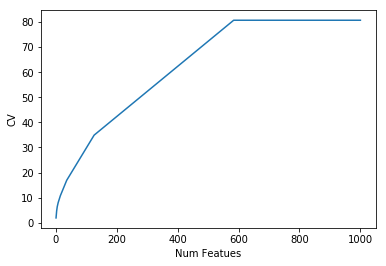

In [13]:
cv=np.cumsum(np.round(pca_model.explained_variance_ratio_,decimals=3)*100)

plt.plot(range(1, 1001),cv)
plt.xlabel('Num Featues')
plt.ylabel('CV')

plt.show()

In [14]:
# TODO: Re-run PCA with the "correct" number of features and then run K-means in one the PCA transformed data.
n_features = 600
pca_model_correct = PCA(n_components = n_features)
pca_model_correct.fit(data_bool)


PCA(copy=True, iterated_power='auto', n_components=600, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

2/10 num_clusters done
3/10 num_clusters done
4/10 num_clusters done
5/10 num_clusters done
6/10 num_clusters done
7/10 num_clusters done
8/10 num_clusters done
9/10 num_clusters done
10/10 num_clusters done


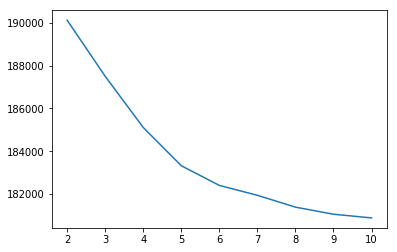

In [21]:
data_pca = pca_model_correct.transform(data_bool)
distortions_pca = [None, None]

for i in range(2,11):
    distortions_pca.append(getDistortion(data_pca, i))
    print(str(i) + "/%s num_clusters done" % 10)
plt.plot(distortions_pca)
plt.show()

## Step 1.4 Results
Enter the number of features in the next cell, then the value of k for the following cell.

In [22]:
distortions_pca

[None,
 None,
 190125.43351221664,
 187502.85249460305,
 185109.87174296877,
 183322.03328883869,
 182400.95526654267,
 181939.38633888753,
 181385.41111545177,
 181053.90969779345,
 180881.6486493104]

## Step 1.5: Evaluating Cluster Results
Rerun K-means with your best results and lets compare to the actual given class. One issue is that the cluster labels will not line up with your class names so we will need to map cluster labels to the class label

In [87]:
from statistics import mode
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
data = bbc_df.as_matrix()
data_scaled = min_max_scaler.fit_transform(data_scaled)
km = KMeans(5, max_iter=300, random_state=0, n_init=30, init='random')
km.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=5, n_init=30, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [88]:
clusters_df = pd.DataFrame(km.labels_,  dtype=int).reset_index()
clusters_df.columns = ['Doc', 'Cluster']
clusters_df['Real'] = document_class.values



clusters_df['Predicted'] = clusters_df.apply(
    lambda row: mode(document_class[(clusters_df['Cluster']==row['Cluster']).values].values), axis=1).values
    

misclassified = clusters_df[clusters_df['Predicted'] != clusters_df['Real']]
misclassified_ratio = misclassified.shape[0]/data_scaled.shape[0]
misclassified_ratio

0.6530337078651686

Let's see how well the classifier works on the training data. Determine which data points are incorrectly labeled by the classifier.

In [95]:
misclassified.drop('Cluster', 1)

,Doc,Real,Predicted
0,0,0,3
1,1,0,3
2,2,0,3
3,3,0,3
4,4,0,3
5,5,0,3
6,6,0,3
7,7,0,3
8,8,0,3
9,9,0,3


## Step 1.5 Results
This time, enter the ratio between the number of misclassifications and the total number of rows.